In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Load the dataset
file_path = r"C:\Users\STUDENT\Downloads\needstutor - Sheet1.csv"  # Replace with the path to your CSV file
data = pd.read_csv(file_path)

In [4]:
# Drop the S.NO. column
data = data.drop(columns=['S.NO.'])

In [5]:
# Encode the categorical variables
le = LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])

In [6]:
# Define features and target variable
X = data[['REGULAR', 'PASS']]
y = data['NEEDS TUTOR']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train an ID3 decision tree model
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [9]:
# Make predictions
y_pred = model.predict(X_test)


In [10]:
# Calculate accuracy and performance metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


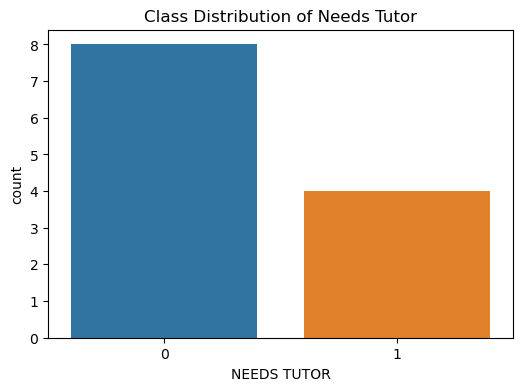

In [11]:
# Plotting Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='NEEDS TUTOR', data=data)
plt.title('Class Distribution of Needs Tutor')
plt.show()

Text(0.5, 1.0, 'Distribution of Regular')

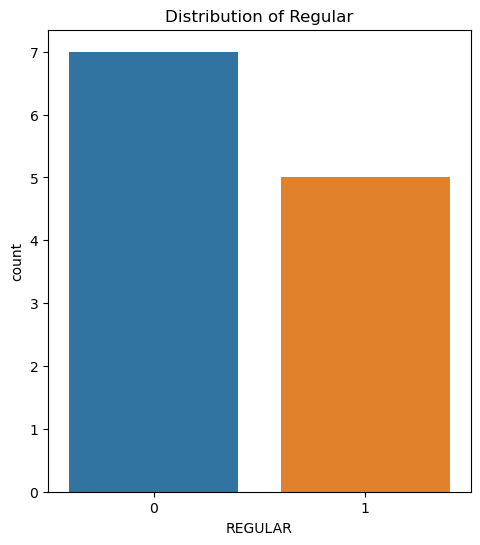

In [12]:
# Plotting Feature Distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='REGULAR', data=data)
plt.title('Distribution of Regular')

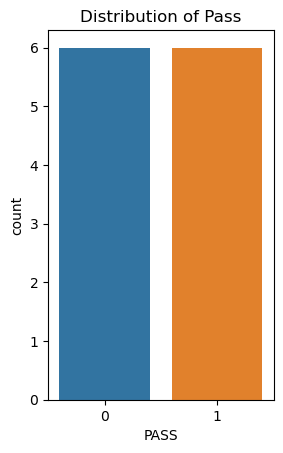

In [13]:
plt.subplot(1, 2, 2)
sns.countplot(x='PASS', data=data)
plt.title('Distribution of Pass')
plt.show()

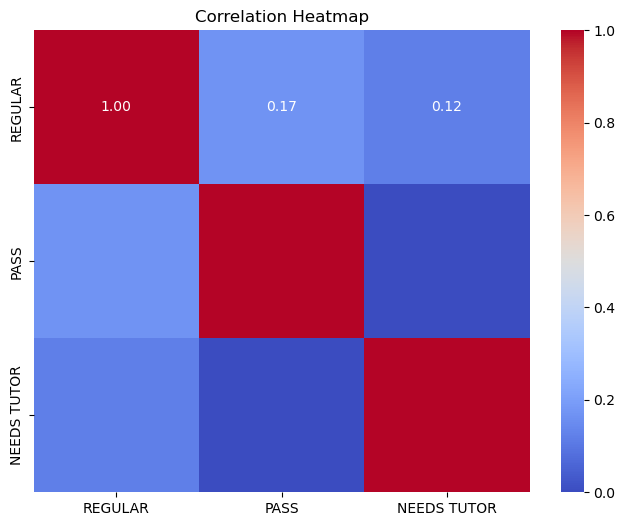

In [14]:
# Plotting Correlation Heatmap
plt.figure(figsize=(8, 6))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

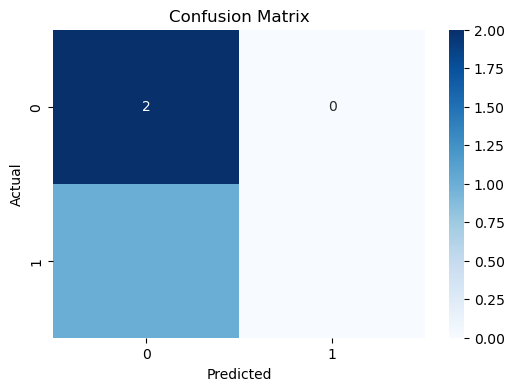

In [15]:
# Plotting Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

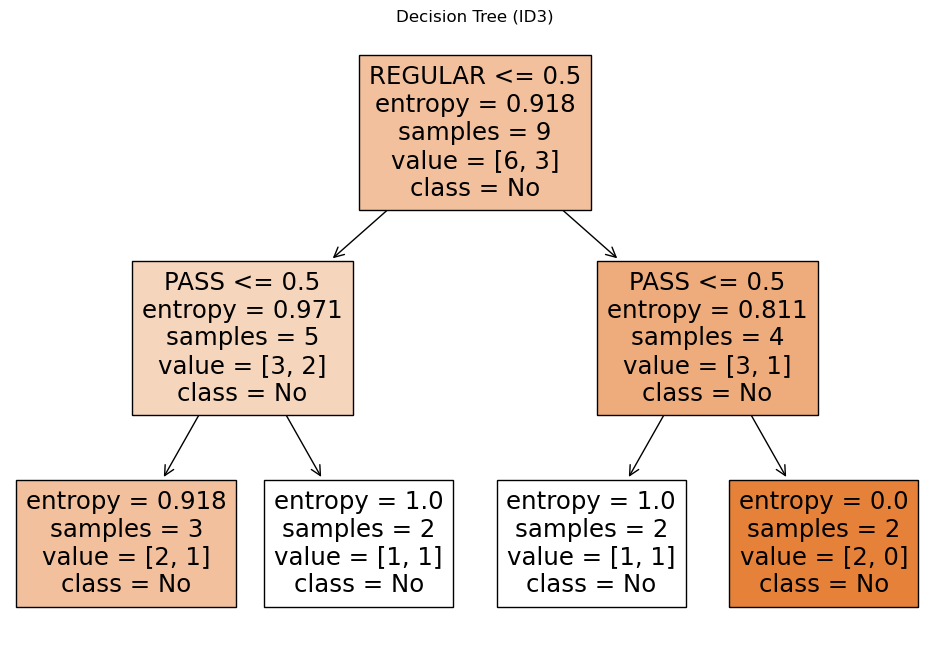

In [16]:
# Plotting the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=['REGULAR', 'PASS'], class_names=['No', 'Yes'], filled=True)
plt.title('Decision Tree (ID3)')
plt.show()